Testing out plotting

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4

In [2]:
URL= "https://www.the-numbers.com/market/2019/summary"
r =requests.get(URL)

In [3]:
soup = bs4.BeautifulSoup(r.text)

In [4]:
table = soup.find_all("table")
rows = table[0].find_all('tr')

In [5]:
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [str.text.strip() for str in cols]
    data.append([str for str in cols if str])


In [6]:
data

[[],
 ['1',
  'Avengers: Endgame',
  'Apr 26, 2019',
  'Walt Disney',
  'Action',
  '$858,373,000',
  '94,223,161'],
 ['2',
  'The Lion King',
  'Jul 19, 2019',
  'Walt Disney',
  'Adventure',
  '$543,638,043',
  '59,674,868'],
 ['3',
  'Star Wars: The Rise of Skyw…',
  'Dec 20, 2019',
  'Walt Disney',
  'Adventure',
  '$451,582,256',
  '49,569,951'],
 ['4',
  'Frozen II',
  'Nov 22, 2019',
  'Walt Disney',
  'Adventure',
  '$450,439,533',
  '49,444,515'],
 ['5',
  'Toy Story 4',
  'Jun 21, 2019',
  'Walt Disney',
  'Adventure',
  '$434,038,008',
  '47,644,128'],
 ['6',
  'Captain Marvel',
  'Mar 8, 2019',
  'Walt Disney',
  'Action',
  '$426,829,839',
  '46,852,891'],
 ['7',
  'Spider-Man: Far From Home',
  'Jul 2, 2019',
  'Sony Pictures',
  'Action',
  '$390,532,085',
  '42,868,505'],
 ['8',
  'Aladdin',
  'May 24, 2019',
  'Walt Disney',
  'Adventure',
  '$355,559,216',
  '39,029,552'],
 ['9',
  'Joker',
  'Oct 4, 2019',
  'Warner Bros.',
  'Thriller/Suspense',
  '$333,985,454',
  

In [7]:
foo = data
foo.pop(0)

[]

In [8]:
ticketsList = [int(x[6].replace(',','')) for x in foo]
revenueList = [int(x[5].strip('$').replace(',','')) for x in foo]
titlesList = [x[1] for x in foo]

In [9]:
ticketsList

[94223161,
 59674868,
 49569951,
 49444515,
 47644128,
 46852891,
 42868505,
 39029552,
 36661410,
 25898326]

In [10]:
%matplotlib inline

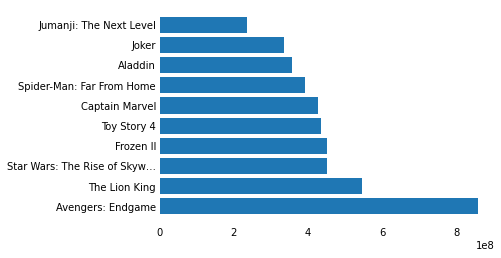

In [11]:
plt.figure()
plt.barh(range(len(revenueList)), revenueList)
plt.yticks(range(len(revenueList)), titlesList)
ax = plt.gca()
ax.set_frame_on(False)
ax.tick_params(length=0)

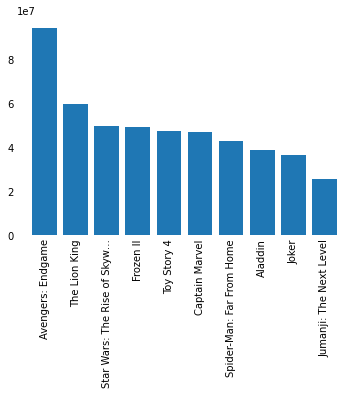

In [12]:
plt.figure()
plt.bar(range(len(ticketsList)), ticketsList)
plt.xticks(range(len(ticketsList)), titlesList, rotation=90)
ax = plt.gca()
ax.set_frame_on(False)
ax.tick_params(length=0)

In [13]:
def createSineWave(sample_rate=10, frequency=1, amplitude=1, phase=0):
    x = np.arange(sample_rate)
    y = amplitude * np.sin(2*np.pi*frequency * (x/sample_rate)+phase)
    return y

In [14]:
def createCosineWave(sample_rate=10, frequency=1, amplitude=1, phase=0):
    x = np.arange(sample_rate)
    y = amplitude * np.cos(2*np.pi*frequency * (x/sample_rate)+phase)
    return y

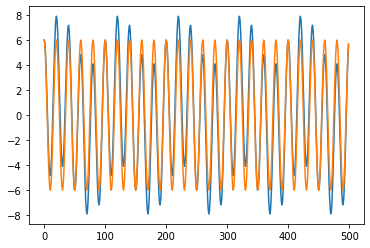

In [15]:
sample_rate = 500
sin10= createSineWave(sample_rate=sample_rate, frequency=5, amplitude = 2, phase = 0)
cos25= createCosineWave(sample_rate=sample_rate, frequency=25, amplitude = 6, phase = 0)
x=np.arange(sample_rate)
plt.figure()
plt.plot(x, sin10+cos25)
plt.plot(x, cos25)

/home/ptracton/COMS4995-s20/coms/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


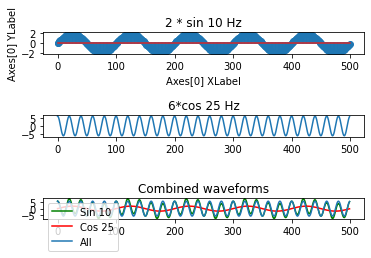

In [23]:
fig, axes = plt.subplots(3)
fig.tight_layout(pad=4.0)
axes[0].set_title('2 * sin 10 Hz')
axes[0].stem(sin10)
axes[0].set_ylabel('Axes[0] YLabel')
axes[0].set_xlabel('Axes[0] XLabel')

axes[1].set_title('6*cos 25 Hz')
axes[1].plot(cos25)

axes[2].set_title("Combined waveforms")
axes[2].plot(sin10+cos25, c='g')
axes[2].plot(sin10, c='r')
axes[2].plot(cos25)
axes[2].legend(["Sin 10", "Cos 25", "All"])